9. Закрепление знаний

In [1]:
import pandas as pd

import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
churn_data = pd.read_csv('data/churn.csv')

In [3]:
churn_data = churn_data.drop('RowNumber', axis=1) 
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


=================================================================================================================================================

Из недочётов:

В 3-м упустили большой выброс клиентов (как ушедших, так и лояльных) с нулевым балансом, это лучше заметно на столбчатой диаграмме.

В задании 5 также дополнительно интересно посмотреть зависимость средней зп от кредитного рейтинга; на основании его можно добавить, что лояльные клиенты более стабильны в указании желаемой з/п, в то время как ушедшие очень "разношёрстные". Отсюда можно сделать вывод, что лояльные представляют собой что-то вроде среднего стабильного класса (почти вне зависимости от кредитного рейтинга). А для ушедших также наблюдается много выбросов при низком и высоком кредитных рейтингах (возможно, это либо клиенты, которые не пользуются услугами банка, либо заядлые должники:))

В 7 и 8 заданиях интересно сделать дополнительное разделение на лояльных и ушедших клиентов и разделить также для наглядности столбцы гистограмм на отдельностоящие.

=================================================================================================================================================

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


In [5]:
def group_customer_by_balance(balance):
    if balance == 0:
        return 'Zero'
    elif balance > 0 and balance <= 2500:
        return 'Low'
    elif balance > 2500 and balance <= 25000:
        return 'Middle'
    elif balance > 25000 and balance <= 100000:
        return 'High'
    elif balance > 100000:
        return 'Extra high'

In [6]:
churn_data['balance_category'] = churn_data['Balance'].apply(group_customer_by_balance)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_category
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Zero
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,High
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Extra high
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Zero
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Extra high


In [14]:

grouped_balances = churn_data.groupby(['balance_category'])['Exited'].mean()
display(grouped_balances)

balance_category
Extra high    0.252344
High          0.204056
Middle        0.666667
Zero          0.138236
Name: Exited, dtype: float64

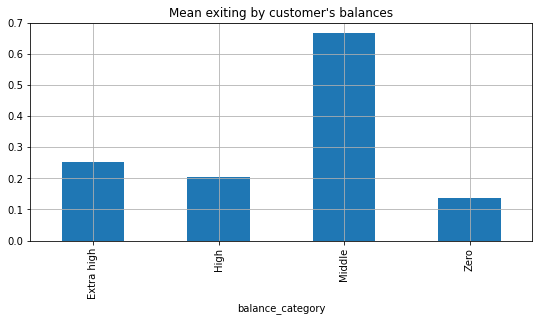

In [ ]:

grouped_balances.plot(
    kind='bar',
    title="Mean exiting by customer's balances",
    grid=True,
    figsize=(9, 4)
);

=================================================================================================================================================

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
# mask for churn type filtering
mask_loyal = churn_data['Exited'] == 0
mask_exited = churn_data['Exited'] == 1

# group by score
grouped_loyal = churn_data[mask_loyal].groupby(['CreditScore'])['EstimatedSalary'].mean()
grouped_exited = churn_data[mask_exited].groupby(['CreditScore'])['EstimatedSalary'].mean()


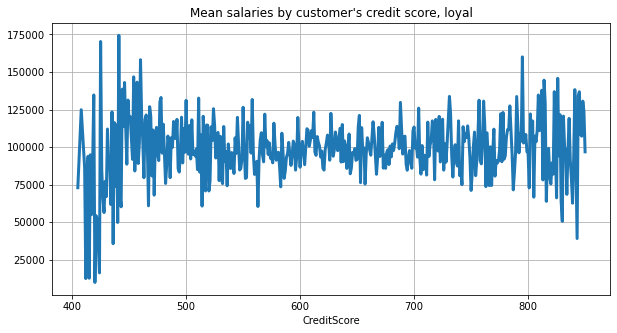

In [ ]:
grouped_loyal.plot(
    kind='line',
    figsize=(10, 5),
    title="Mean salaries by customer's credit score, loyal",
    grid = True,
    lw=3
);


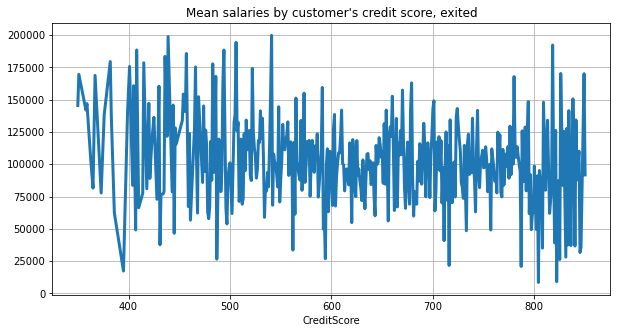

In [ ]:
grouped_exited.plot(
    kind='line',
    figsize=(10, 5),
    #colormap='Oranges',
    title="Mean salaries by customer's credit score, exited",
    grid = True,
    lw=3
);

=================================================================================================================================================

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Я не совсем понял, что имелось ввиду в замечании. По какому признаку набо было строить бары (что по оси у?), взял для примера балансы.
Если необходимо по оси y - количество клиентов, то не догадался как сгруппировать так, чтобы построить этот барплот.

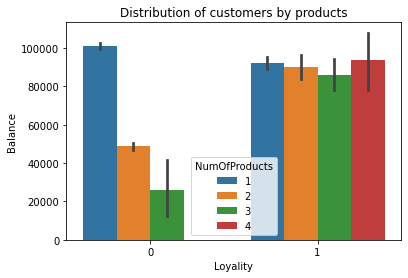

In [13]:
barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    hue='NumOfProducts'
)

barplot.set_title('Distribution of customers by products');
barplot.set_xlabel('Loyality');
barplot.set_ylabel('Balance');



=================================================================================================================================================

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

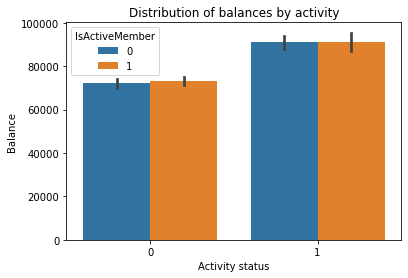

In [15]:
barplot = sns.barplot(
    data=churn_data,
    x='Exited',
    y='Balance',
    hue='IsActiveMember'
)

barplot.set_title('Distribution of balances by activity');
barplot.set_xlabel('Activity status');
barplot.set_ylabel('Balance');